In [2]:
import os
import plaidml.keras

plaidml.keras.install_backend()
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

import time
import tensorflow as tf
import numpy as np
import pandas as pd
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from keras.datasets import cifar10
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from matplotlib import pyplot as plt

ImportError: cannot import name 'conv_utils' from 'keras.utils' (unknown location)

In [15]:
def convert_label(x):
    if x == '0':
        return 'A'
    elif x == '1':
        return 'B'
    elif x == '2':
        return 'C'
    elif x == '3':
        return 'D'
    elif x == '4':
        return 'E'
    elif x == '5':
        return 'F'
    elif x == '6':
        return 'G'
    elif x == '7':
        return 'H'
    elif x == '8':
        return 'I'
    elif x == '9':
        return 'J'
    elif x == '10':
        return 'K'
    elif x == '11':
        return 'L'
    elif x == '12':
        return 'M'
    elif x == '13':
        return 'N'
    elif x == '14':
        return 'O'
    elif x == '15':
        return 'P'
    elif x == '16':
        return 'Q'
    elif x == '17':
        return 'R'
    elif x == '18':
        return 'S'
    elif x == '19':
        return 'T'
    elif x == '20':
        return 'U'
    elif x == '21':
        return 'V'
    elif x == '22':
        return 'W'
    elif x == '23':
        return 'X'
    elif x == '24':
        return 'Y'
    elif x == '25':
        return 'Z'


In [3]:
# Initialising the CNN
classifier = Sequential()

In [4]:
classifier.add(Conv2D(32, (5, 5), strides =(1,1),activation='relu', input_shape=(64, 64,3)))
classifier.add(Conv2D(64, (5, 5), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# classifier.add(Dropout(0.25))
classifier.add(Flatten())
classifier.add(Dense(256, activation='relu'))
# classifier.add(Dropout(0.5))
classifier.add(Dense(29, activation='softmax')) 

classifier.compile(loss='categorical_crossentropy',optimizer='adadelta', metrics=['accuracy'])


INFO:plaidml:Opening device "metal_amd_radeon_pro_5300m.0"


In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [52]:
train_generator = train_datagen.flow_from_directory(
    'archive/asl_alphabet_train/asl_alphabet_train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    'archive/asl_alphabet_train/asl_alphabet_train', # same directory as training data
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [103]:
classifier.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
2175/2175 [==============================] - 189s 87ms/step - loss: 0.1306 - acc: 0.9572 - val_loss: 2.5238 - val_acc: 0.5930
Epoch 2/20
2175/2175 [==============================] - 201s 93ms/step - loss: 0.0817 - acc: 0.9735 - val_loss: 2.3813 - val_acc: 0.6155
Epoch 3/20
2175/2175 [==============================] - 210s 96ms/step - loss: 0.0577 - acc: 0.9811 - val_loss: 2.6344 - val_acc: 0.6091
Epoch 4/20
2175/2175 [==============================] - 230s 106ms/step - loss: 0.0440 - acc: 0.9865 - val_loss: 3.1338 - val_acc: 0.6091
Epoch 5/20
2175/2175 [==============================] - 235s 108ms/step - loss: 0.0368 - acc: 0.9886 - val_loss: 3.3234 - val_acc: 0.6117
Epoch 6/20
2175/2175 [==============================] - 232s 107ms/step - loss: 0.0297 - acc: 0.9906 - val_loss: 3.5224 - val_acc: 0.6069
Epoch 7/20
2175/2175 [==============================] - 230s 106ms/step - loss: 0.0254 - acc: 0.9916 - val_loss: 3.5807 - val_acc: 0.6132
Epoch 8/20
2175/2175 [===============

In [21]:
classifier.save('model.h5')

NameError: name 'classifier' is not defined

In [2]:
img_path = "./archive/asl_alphabet_train/asl_alphabet_train/A/A21.jpg"

In [3]:
img = image.load_img(img_path, target_size=(64,64)) # resize image

img_array = image.img_to_array(img)
img_batch=np.expand_dims(img_array, axis=0) #deep learning models expect a batch of images as input

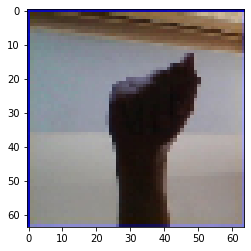

In [50]:
plt.imshow(img)

In [51]:
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

In [52]:
new_model = load_model('model.h5')
prediction = new_model.predict(img_preprocessed)
prediction

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)